In [27]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, KFold

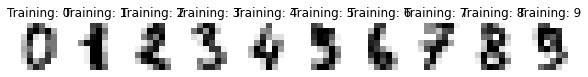

In [7]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' %label)

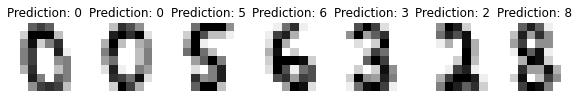

In [24]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=True)

# create support vector machine classifier
clf = svm.SVC(gamma=0.005)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10,3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [25]:
print(clf.score(X_test, y_test))

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

0.9432703003337041
Classification report for classifier SVC(gamma=0.005):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       1.00      0.90      0.95       101
           2       1.00      0.98      0.99        84
           3       1.00      0.90      0.95        94
           4       1.00      0.92      0.96       103
           5       0.97      0.98      0.97        86
           6       1.00      0.93      0.96        87
           7       1.00      0.96      0.98        94
           8       0.64      1.00      0.78        85
           9       0.99      0.91      0.95        91

    accuracy                           0.94       899
   macro avg       0.96      0.95      0.95       899
weighted avg       0.96      0.94      0.95       899




In [26]:
print(clf.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.005, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
